In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import wrangle

pd.options.display.max_columns = None

In [2]:
train, test, validate = wrangle.wrangle_zillow()

Question: What are the strongest predictors for property value?

Hypothesis: Location, structure size + lot size, age

In [3]:
train.head()

,parcelid,bedroomcnt,calc_bath,structure_sqft,fips,fullbathcnt,latitude,longitude,lot_sqft,regionidcity,regionidzip,roomcnt,unitcnt,yearbuilt,tax_structure,tax,tax_land,taxdelinquencyflag,heatingorsystemdesc,years_tax_delinquent,bathroom_sum,age
6816,12161651,3,1.0,1142,6037,1,34.206140,-118.142548,6416,30187,96265,0,1,1947,29594,58361,28767,False,Floor/Wall,0,1.0,70
50406,12607174,3,2.0,2072,6037,2,33.819596,-118.344648,6359,54722,96163,0,1,1954,112195,175134,62939,True,Floor/Wall,4,2.0,63
23474,14316877,3,3.0,2168,6059,3,33.601725,-117.877784,3540,53571,96957,6,1,1956,188947,615142,426195,False,Central,0,3.0,61
14242,13089704,4,3.0,1880,6037,3,34.017132,-117.883275,8519,34636,96522,0,1,1986,260000,678000,418000,False,Central,0,3.0,31
35766,14021653,5,3.0,2711,6059,3,33.671796,-117.940255,6262,38032,96958,9,1,1967,153384,569451,416067,False,Central,0,3.0,50


## Do structures decrease in value with age?

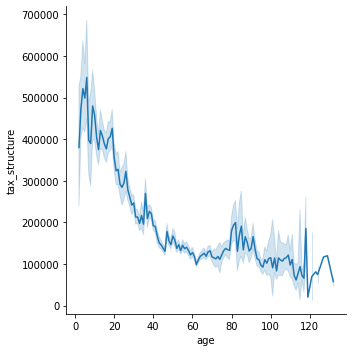

In [13]:
sns.relplot(data=train, x='age', y='tax_structure', kind='line')

#### Takeaways:
There seems to be a curving relationship between age and structure value.  This could be a strong predictor of structure value.

## What about the land's value and age?

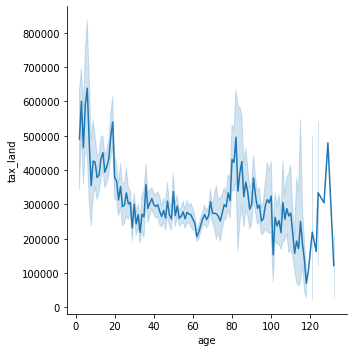

In [14]:
sns.relplot(data=train, x='age', y='tax_land', kind='line')

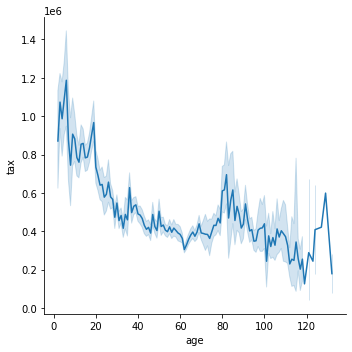

In [21]:
sns.relplot(data=train, x='age', y='tax', kind='line')

#### Takeaways:
This seems to reflect how the structure's value relates to age, but with a lot more noise.

### New Hypothesis: Land value is dependant on structure value

## How does land value affect structure value?

<AxesSubplot:xlabel='tax_structure', ylabel='tax_land'>

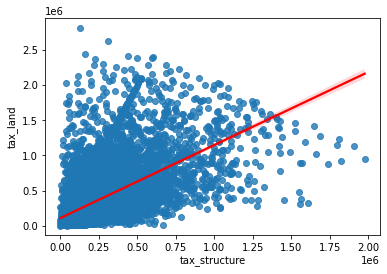

In [52]:
sns.regplot(data=train, x='tax_structure', y='tax_land', line_kws={'color':'red'})

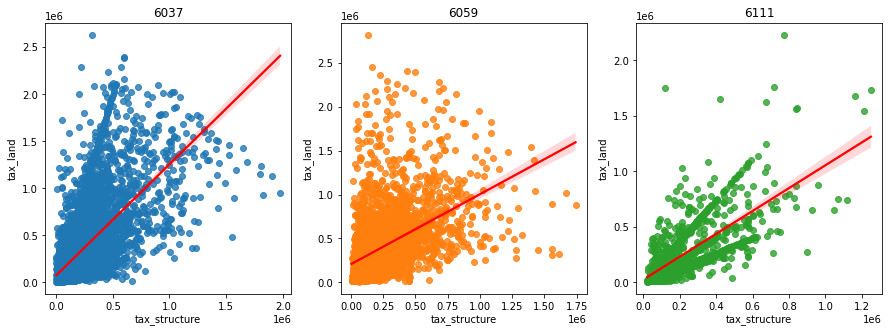

In [83]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
palette = sns.color_palette()
fipList = train.fips.unique().tolist()
for i, fip in enumerate(fipList):
    sns.regplot(data=train[train.fips == fip], x='tax_structure', y='tax_land',
    color=palette[i],
    ax=ax[i],
    line_kws={'color':'red'})
    ax[i].set_title(fip)

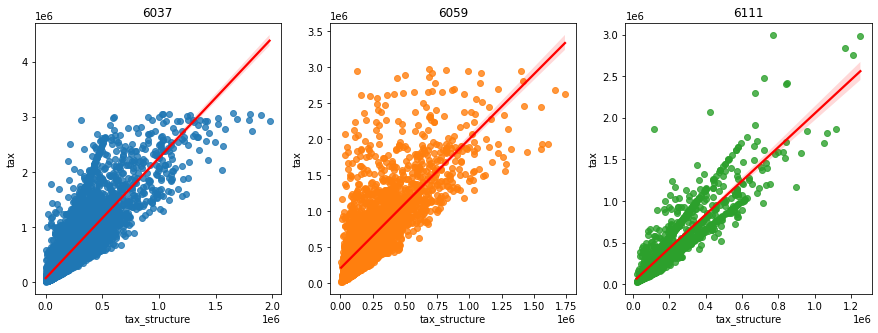

In [84]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
palette = sns.color_palette()
fipList = train.fips.unique().tolist()
for i, fip in enumerate(fipList):
    sns.regplot(data=train[train.fips == fip], x='tax_structure', y='tax',
    color=palette[i],
    ax=ax[i],
    line_kws={'color':'red'})
    ax[i].set_title(fip)

## How does location affect value?

In [90]:
import plotly.express as px
fig = px.scatter_mapbox(train, lat="latitude", lon="longitude", color="tax", 
                    # size='structure_sqft',
                    color_continuous_scale=px.colors.sequential.Plasma, size_max=15, zoom=8)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":20,"t":0,"l":0,"b":0})
fig.update_layout(width=800, height= 700)
fig.show()

#### Takeaways
There are definitely some hotspots, but the location data won't play nicely with a linear regression model so we can't use it for now.  
A possible way forward would be to use clustering to group these into categories (hotspot/not-hotspot).

## How does structure sqft affect structure value ?

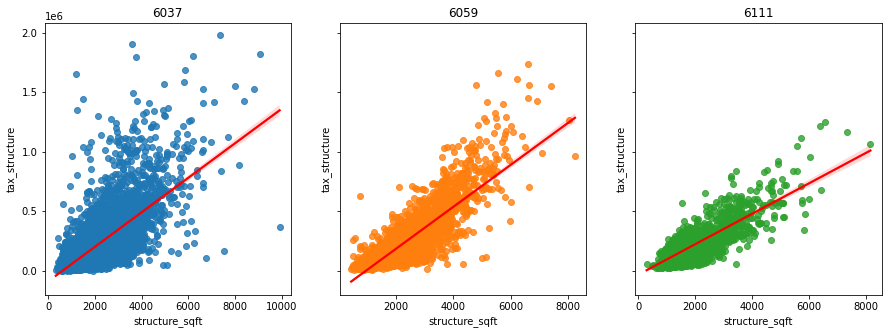

In [92]:
fig, ax = plt.subplots(1,3, figsize=(15,5), sharey=True)
palette = sns.color_palette()
fipList = train.fips.unique().tolist()
for i, fip in enumerate(fipList):
    sns.regplot(data=train[train.fips == fip], x='structure_sqft', y='tax_structure',
    color=palette[i],
    ax=ax[i],
    line_kws={'color':'red'})
    ax[i].set_title(fip)

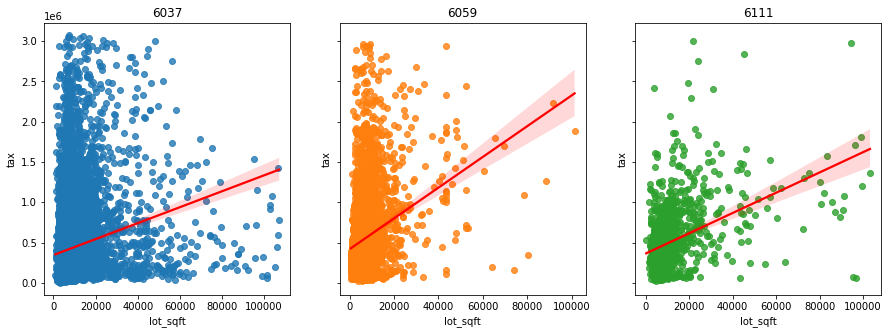

In [96]:
fig, ax = plt.subplots(1,3, figsize=(15,5), sharey=True)
palette = sns.color_palette()
fipList = train.fips.unique().tolist()
for i, fip in enumerate(fipList):
    sns.regplot(data=train[train.fips == fip], x='lot_sqft', y='tax',
    color=palette[i],
    ax=ax[i],
    line_kws={'color':'red'})
    ax[i].set_title(fip)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

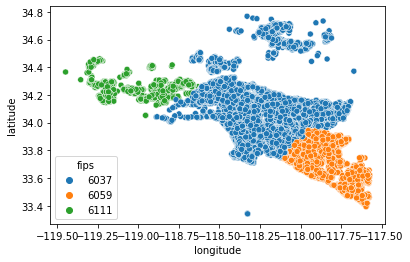

In [97]:
sns.scatterplot(data=train, y='latitude', x='longitude', hue='fips')

<AxesSubplot:xlabel='age', ylabel='structure_sqft'>

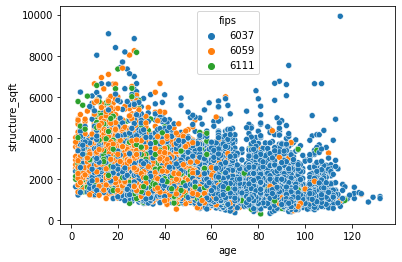

In [98]:
sns.scatterplot(data=train, y='structure_sqft', x='age', hue='fips')